## Rotation Gate

Rotates the phase space.

Shifts the $\hat{X}$ quadrature to $\left(\hat{X}\cos\phi - \hat{P}\sin\phi\right)$ and $\hat{P}$ quadrature to $\left(\hat{P}\cos\phi + \hat{X}\sin\phi\right)$.

In [14]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Apply rotation gate to a coherent state

Rotation gate simply makes a rotation

In [15]:
prog = sf.Program(1)
eng = sf.Engine('gaussian')

with prog.context as q:
    Dgate(1) | q[0]
    Rgate(np.pi/2) | q[0]
    
# eng.reset()
state = eng.run(prog).state

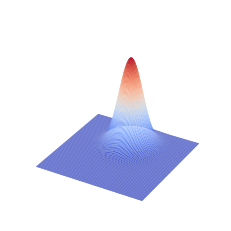

In [16]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)

X, P = np.meshgrid(X, P)

ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap=cm.coolwarm, rstride=1, cstride=1, linewidth=0, antialiased=True)

#fig.set_size_inches(4.8, 5)
ax.set_axis_off()

plt.savefig("rotation.png", dpi=1080, transparent=True, bbox_inches='tight', pad_inches=0)